<a href="https://colab.research.google.com/github/Shreyash-Jagdale/Real-Estate-Valuation-Prediction/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Real Estate Valuation Prediction**

Attribute Information:
The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

Y= house price of unit area


In [2]:
# importing libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# loading the dataset
temp_df=pd.read_csv('/content/Real estate valuation data set.xlsx.csv')

##**Preprocessing of data**

In [ ]:
temp_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
temp_df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
# droping unnecessary column
df=temp_df.drop('No',axis=1)

In [6]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# renaming columns with appropriate names
df.rename(columns=
          {'X1 transaction date' : 'transaction_date' ,
           'X2 house age' : 'house_age' ,
           'X3 distance to the nearest MRT station' : 'distance_to_the_nearest_MRT_station' ,
           'X4 number of convenience stores' : 'number_of_convenience_stores' , 
           'X5 latitude' : 'latitude' ,
           'X6 longitude' : 'longitude' ,
           'Y house price of unit area' : 'house_price'
          }
          ,inplace=True)

##**EDA**

**Correlation matrix and heatmap**




In [8]:
# correlation matrix of variables
df.corr()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


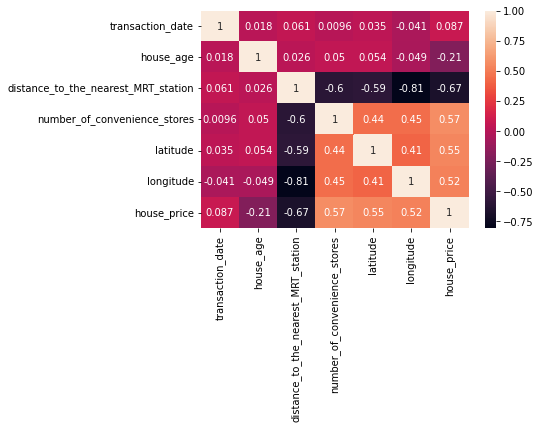

In [9]:
sns.heatmap(df.corr(),annot = True)

From this heatmap, it can be concluded that there is no perfect multicollinearity but there is imperfect multi collinearity between longitude and distance between metro station as it can be thought intuitively also that as longitudinal co-ordinate changes then accordingly distance from metro station would also change.
All three attributes longitude, latitude and distance from nearest metro station gives insight about the same thing i.e., the effect of location on prices. So, instead using all three variables in regression it would be better to try only one of them in the final equation.


**Scatter plots**

Text(0.5, 1.0, 'house_price vs longitude')

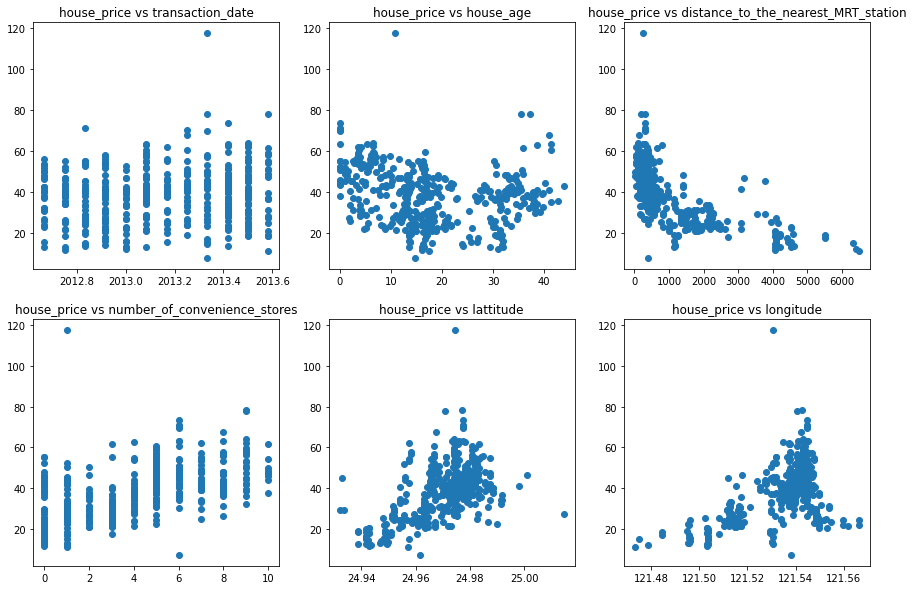

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
fig , axis = plt.subplots(2,3)
axis[0,0].scatter(df.transaction_date,df.house_price)
axis[0,0].set_title('house_price vs transaction_date')
axis[0,1].scatter(df.house_age,df.house_price)
axis[0,1].set_title('house_price vs house_age')
axis[0,2].scatter(df.distance_to_the_nearest_MRT_station,df.house_price)
axis[0,2].set_title('house_price vs distance_to_the_nearest_MRT_station')
axis[1,0].scatter(df.number_of_convenience_stores,df.house_price)
axis[1,0].set_title('house_price vs number_of_convenience_stores')
axis[1,1].scatter(df.latitude,df.house_price)
axis[1,1].set_title('house_price vs lattitude')
axis[1,2].scatter(df.longitude,df.house_price)
axis[1,2].set_title('house_price vs longitude')

It can be drawn form these scatter plots that house nearer to metro station as well as houses that are new i.e., those which less age have higher prices. 

**Histogram**

Text(0.5, 1.0, 'number_of_convenience_stores')

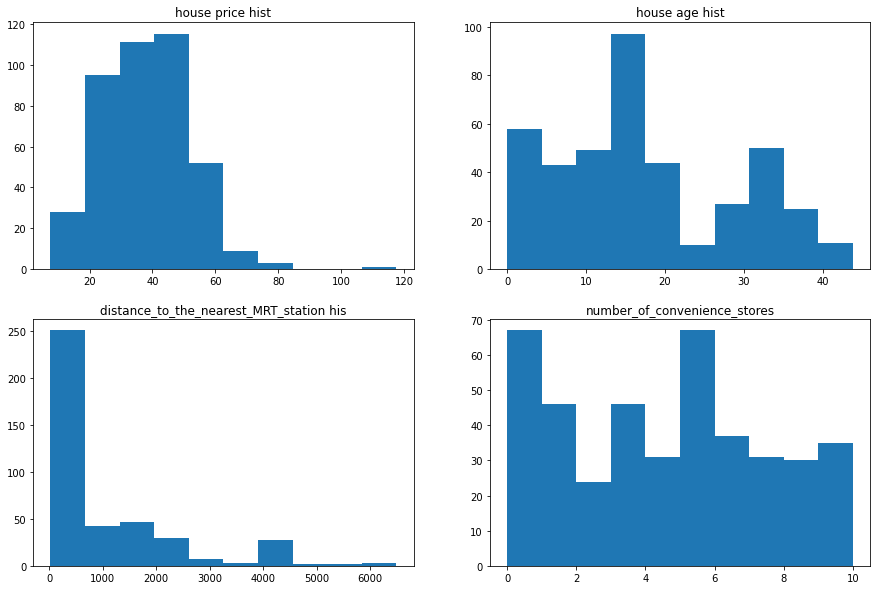

In [ ]:
fig , axis = plt.subplots(2,2)
axis[0,0].hist(df.house_price)
axis[0,0].set_title('house price hist')
axis[0,1].hist(df.house_age)
axis[0,1].set_title('house age hist')
axis[1,0].hist(df.distance_to_the_nearest_MRT_station)
axis[1,0].set_title('distance_to_the_nearest_MRT_station his')
axis[1,1].hist(df.number_of_convenience_stores)
axis[1,1].set_title('number_of_convenience_stores')

From the above charts, it can be it can be assumed that variables house price, house age and number of convenient stores are symmetric and thus are normal. The variable distance from the nearest metro station seems to be positively skewed but can be standardised for our convenience.

In [10]:
# log transformation
distance_to_the_nearest_MRT_station = np.log10(df.distance_to_the_nearest_MRT_station)

(array([ 2.,  6., 27., 44., 78., 94., 39., 54., 34., 36.]),
 array([1.36889726, 1.61321876, 1.85754026, 2.10186175, 2.34618325,
        2.59050475, 2.83482625, 3.07914775, 3.32346925, 3.56779075,
        3.81211225]),
 <a list of 10 Patch objects>)

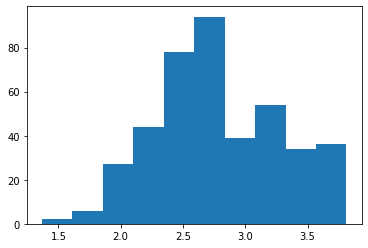

In [11]:
plt.hist(distance_to_the_nearest_MRT_station)

From the above chart it can be drawn that the variable distance from the nearest metro station is standardised as it seems to be symmetric in nature.

In [12]:
# replacing earlier column with transformed one
df['distance_to_the_nearest_MRT_station'] = distance_to_the_nearest_MRT_station

In [13]:
df.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,1.928799,10,24.98298,121.54024,37.9
1,2012.917,19.5,2.486565,9,24.98034,121.53951,42.2
2,2013.583,13.3,2.749724,5,24.98746,121.54391,47.3
3,2013.500,13.3,2.749724,5,24.98746,121.54391,54.8
4,2012.833,5.0,2.591697,5,24.97937,121.54245,43.1


##**Train-Test Split**

In [14]:
dependent_variable = 'house_price'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [15]:
features = ['house_age' , 'distance_to_the_nearest_MRT_station' , 'number_of_convenience_stores']

In [16]:
X = df[features].values
y = df[dependent_variable].values

In [17]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.33 , random_state= 1)

In [18]:
X_train[0:10]

array([[13.        ,  2.69216923,  5.        ],
       [ 3.5       ,  2.87928958,  3.        ],
       [ 6.5       ,  1.95643767,  9.        ],
       [33.5       ,  3.29637359,  2.        ],
       [25.6       ,  3.65510865,  0.        ],
       [30.        ,  3.00575561,  5.        ],
       [31.7       ,  3.06425352,  0.        ],
       [ 4.1       ,  2.49540043,  5.        ],
       [ 3.8       ,  2.58417557,  5.        ],
       [ 8.9       ,  3.14811812,  0.        ]])

In [19]:
# scaling of features
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [20]:
X_train[0:10]

array([[0.30444965, 0.54161094, 0.5       ],
       [0.08196721, 0.6181987 , 0.3       ],
       [0.15222482, 0.24047839, 0.9       ],
       [0.78454333, 0.78890983, 0.2       ],
       [0.59953162, 0.93573893, 0.        ],
       [0.70257611, 0.66996084, 0.5       ],
       [0.74238876, 0.69390384, 0.        ],
       [0.09601874, 0.46107411, 0.5       ],
       [0.08899297, 0.49740949, 0.5       ],
       [0.20843091, 0.72822935, 0.        ]])

##**Model Fitting**

**Ordinary Least Square Regression model**

In [32]:
model = sm.OLS(y_train , X_train).fit()

In [33]:
# summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              764.8
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                   8.82e-133
Time:                        12:07:03   Log-Likelihood:                         -1104.4
No. Observations:                 277   AIC:                                      2215.
Df Residuals:                     274   BIC:                                      2226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3037      2.876     -0.106      0.916      -5.965       5.358
x2            27.5531      2.267     12.152      0.000      23.089      32.017
x3            48.6908      2.169     22.452      0.000      44.422      52.960
==============================================================================
Omnibus:                        9.592   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.902
Skew:                           0.463   Prob(JB):                      0.00708
Kurtosis:                       3.021   Cond. No.                         3.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this summary output of regression model, it can be concluded that model is statistically significant. The R squared for the model is 0.89 i.e., Around 89% of total variation in the response house price can be explained by the predictor variables.
From summary output, it can be drawn that house age is not significantly contributing in the prediction of house price.


Model can be given as,

House price = -0.3037*(House age) +27.5531*(Distance from the nearest metro station) + 48.690*(number of convenient stores)

In [ ]:
model.predict(X_test)

array([41.7365988 , 42.49133458, 26.70659587, 26.83690142, 23.46374028,
       32.15352319, 36.63866718, 39.14287395, 22.24421312, 29.59090627,
       29.89020013, 41.32209612, 21.50796422, 33.44423715, 51.51458258,
       35.95687232, 23.46374028, 36.59723925, 36.74992318, 38.07445119,
       53.83141959, 40.86052518, 49.67548986, 43.09586192, 40.64084798,
       27.026452  , 37.93175633, 35.4333405 , 40.38796748, 26.7679811 ,
       38.37052369, 30.15972702, 32.15813635, 35.48019905, 48.67468622,
       27.22739357, 38.58971969, 33.42139756, 23.96622932, 26.80175751,
       46.69071587, 20.59968211, 51.43258013, 38.25070316, 32.32005433,
       37.0525872 , 32.33501534, 35.35780712, 41.42762925, 25.68089664,
       27.23910821, 44.5193315 , 50.59790395, 27.11942019, 56.76966699,
       52.13907565, 23.46374028, 29.46771149, 22.490982  , 40.26176189,
       20.61931289, 20.32934436, 35.41567881, 27.22739357, 23.45082844,
       52.061404  , 37.37205992, 51.00370307, 27.13113482, 23.10

##**Conclusion**

That's it! We reached the end of our exercise.
Starting with loading the data so far, we have done EDA, null values treatment, feature selection and then model building. The R squared of our model is 89% which can be said to be good for this dataset. This performance could be due to various reasons like: no proper pattern of data, not enough relevant features. 
